## Chapter2 in Pytorch

In [1]:
import torch as t

In [2]:
# autograd is a modual while Variable is a class
from torch.autograd import Variable

In [3]:
# using a tensor to build a Variable
x = Variable(t.ones(2,2), requires_grad=True)

In [4]:
# check the x value
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [5]:
# sum each element in x
y = x.sum()
# show y
y

tensor(4., grad_fn=<SumBackward0>)

In [6]:
# check the function "grad_fn"
y.grad_fn

In [7]:
# backward which was used to caculate the gradients
y.backward()

In [8]:
# y is the sum of x , which means y = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# so the gradients of each position is 
x.grad

tensor([[1., 1.],
        [1., 1.]])

In [9]:
# Variable have almost the same interface with Tensor
x = Variable(t.ones(4,5))
y = t.cos(x)
x_tensor_cos = t.cos(x.data)
print(y)
x_tensor_cos
# the two output are tensor, i guess in this version pytorch combite it 

tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])


tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])

### use nn.Module to build LeNet

In [10]:
# nn.Module is the most important class in nn
# when we define a network we should inherite from nn.Module which has define forward method and so on
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class Net(nn.Module):
    def __init__(self):
        # call the father init function
        super(Net, self).__init__()
        # first is input channel, seconde params is output channel, the third represents the size of kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # fully connected layer
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    # x is the input
    def forward(self, x):
        # conv -> activate -> pool
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
# instantialize the Net
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [13]:
# net.parameters return the params which can be learned but without name
params = list(net.parameters())
print(len(params))

10


In [14]:
# named_parameters() return name and params
for name, parameters in net.named_parameters():
    print(name, ':', parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [15]:
# note: owning to the forward function needs Variable to be input beacause only Variable can auto grad, so we need encasulate the
# tensor to be Variable
# conv2d input format: samples x channel x heights x widths
input = Variable(t.randn(1, 1, 32, 32))
out = net(input)
print(out.size())

torch.Size([1, 10])


In [16]:
# remember to set the grad to be zero when you want to auto grad
net.zero_grad()
out.backward(Variable(t.ones(1, 10))) 
# FQA: How to show grad?
# A: I don't know yet...

### lost function

In [17]:
# use MSELoss
output = net(input)
print(output.size())
target = Variable(t.arange(0,10))
print(target.size())
criterion = nn.MSELoss()

torch.Size([1, 10])
torch.Size([10])


In [18]:
loss = criterion(output, target)
# I am not sure why does it wrong

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'target'

---

### CIFAR-10 clasification

In [19]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # convert Tensor to image to visulize

In [20]:
# define the pre-deal to data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
])

In [21]:
# training set
trainset = tv.datasets.CIFAR10(
    root='data/',
    train=True,
    download=True,
    transform=transform
)
trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

Files already downloaded and verified


In [22]:
# test set
testset = tv.datasets.CIFAR10(
    root='data/',
    train=False,
    download=True,
    transform=transform
)
testloader = t.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

Files already downloaded and verified


In [23]:
# the classes name
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

ship


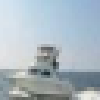

In [24]:
# dataset is an object which can access via index
(data, label) = trainset[100]
print(classes[label])
show((data+1)/2).resize((100,100))

        cat         car        frog         dog


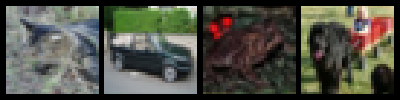

In [25]:
# note: DataLoader is iteratable object
dataiter = iter(trainloader)
images, labels = dataiter.next() # batch is 4
print(' '.join('%11s' % classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [26]:
# define the network
# just copy the net from just define and modify the channel from 1 to 3
class Net(nn.Module):
    def __init__(self):
        # call the father init function
        super(Net, self).__init__()
        # first is input channel, seconde params is output channel, the third represents the size of kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # fully connected layer
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    # x is the input
    def forward(self, x):
        # conv -> activate -> pool
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [27]:
# check the net
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [28]:
# define loss and optimizer
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
# train the net
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): # the 0 means i start from 0
        # input data
        inputs, labels = data
        # to auto grad we need transform inputs to Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # set grad to zero
        optimizer.zero_grad()
        
        # forward & backward
        outputs = net(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()
        
        # update the params
        optimizer.step()
        
        # print the message of log
        running_loss += loss.data
        # print the training status each 2000 batch
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f'  \
                 % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.230
[1,  4000] loss: 1.930
[1,  6000] loss: 1.682
[1,  8000] loss: 1.578
[1, 10000] loss: 1.509
[1, 12000] loss: 1.460
[2,  2000] loss: 1.374
[2,  4000] loss: 1.372
[2,  6000] loss: 1.338
[2,  8000] loss: 1.309
[2, 10000] loss: 1.292
[2, 12000] loss: 1.297
Finished Training


The true labels:  ship ship ship dog


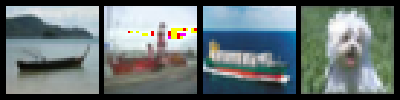

In [30]:
# test the model
dataiter = iter(testloader)
images, labels = dataiter.next()
print("The true labels: ", ' '.join(\
                                   '%0.8s' % classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))

In [31]:
# now we predict the label
outputs = net(Variable(images))
# get the highest score and predict it as the true label
_, predicted = t.max(outputs.data, 1) # the input and output of the net is Variable so we so call the data
print("The predicted labels: ", ' '.join('%5s' \
                                        % classes[predicted[j]] for j in range(4)))


The predicted labels:    car  ship   car   dog


In [32]:
# We just test 4 images above 
# now we test model on the whole testset
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = t.max(outputs, 1)
    total += labels.size(0) # remember that the batch size of testlaoder is 4
    # print(labels)
    # print(labels.size()) # --> torch.Size([4])
    correct += (predicted == labels).sum()
    
print('The accuracy in 10000 testsets is : %d %%' % (100 * correct / total))

The accuracy in 10000 testsets is : 54 %


In [33]:
# transfer model from cpu to gpu just as tensor does:
# eg. x = t.ones(4,5)
# if t.cuda.is_avaialbe():
#     x = x.cuda()
if t.cuda.is_available():
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    output = net(Variable(images))
    loss = criterion(output, Variable(labels))
    print(loss)

tensor(0.5722, device='cuda:0', grad_fn=<NllLossBackward>)


### SUMMARY
> In this chapter, we learn `Tensor`,`Variable` in autograd, `nn`, etc.
> `Tensor`is a structure like numpy array and it can tranfer to each other easily.What's more, `Tensor` is the basic data structure in pytorch
> `Variable` is an encapsulation over `Tensor` and provide autograd function
> `nn` is an interface fo neural network and provide many useful function such as loss func, layer, optim, etc.